# ВКР. Сравнительный анализ альтернативных сценариев
Основной персонал (руководитель и разработчик) не изменяются.

2admins - два администратора корпоративного портала; adm_inte - один администратор и стажер; admin_2intern - один администратор и два стажера

Средняя занятость ресурсам по альтернативам:


|Номер альтернативы| Наименование модели|	Руководитель|	Разработчик|	Стажер|	Администратор|
|---|---|---|---|---|---|
|0 |main|0,992|	0,976|	0,769|	-|
|1	|admin_2intern|0,872	|0,851	|0,764	|0,817|
|2	|adm_inte|0,915 |0,885	|0,824	|0,891|
|3	|2admins|0,894	|0,879	|-	|0,888


## Датасеты содержат данные о всех выполненных заданиях по каждому ресурсу за 100 итераций по альтернативам

In [26]:
import matplotlib
matplotlib.use('TkAgg')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
from math import sqrt
%matplotlib inline
sns.set()

In [2]:
main_tasks_manager_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/manager_tasks.xlsx")
main_tasks_developer_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/developer_tasks.xlsx")
main_tasks_interns_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/interns_tasks.xlsx")

admin_intern_tasks_manager_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/adm_inte_ler_final_v2/manager_tasks.xlsx")
admin_intern_tasks_developer_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/adm_inte_ler_final_v2/developer_tasks.xlsx")
admin_intern_tasks_admin_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/adm_inte_ler_final_v2/admin_tasks.xlsx")
admin_intern_tasks_intern_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/adm_inte_ler_final_v2/interns_tasks.xlsx")

admins_tasks_manager_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/admins_final_v2/manager_tasks.xlsx")
admins_tasks_developer_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/admins_final_v2/developer_tasks.xlsx")
admins_tasks_admin_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/admins_final_v2/admin_tasks.xlsx")

admin_2interns_tasks_manager_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/admin_2intern_learning_final_v2/manager_tasks.xlsx")
admin_2interns_tasks_developer_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/admin_2intern_learning_final_v2/developer_tasks.xlsx")
admin_2interns_tasks_admin_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/admin_2intern_learning_final_v2/admin_tasks.xlsx")
admin_2interns_tasks_intern_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/admin_2intern_learning_final_v2/interns_tasks.xlsx")

In [3]:
main_tasks_manager_df["model"] = main_tasks_developer_df["model"] =  main_tasks_interns_df["model"] = "main"

admin_intern_tasks_manager_df["model"] = admin_intern_tasks_developer_df["model"] = \
                    admin_intern_tasks_admin_df["model"] = admin_intern_tasks_intern_df["model"] = "admin_intern"

admins_tasks_manager_df["model"] = admins_tasks_developer_df["model"] = admins_tasks_admin_df["model"] = "2admins"

admin_2interns_tasks_manager_df["model"] = admin_2interns_tasks_developer_df["model"] = \
                    admin_2interns_tasks_admin_df["model"] = admin_2interns_tasks_intern_df["model"] = "admin_2interns"

In [4]:
main_tasks_manager_df["staff"], main_tasks_developer_df["staff"],  main_tasks_interns_df["staff"] = "manager", "developer", "intern"

admin_intern_tasks_manager_df["staff"], admin_intern_tasks_developer_df["staff"], \
        admin_intern_tasks_admin_df["staff"], admin_intern_tasks_intern_df["staff"] = "manager", "developer", "admin","intern"

admins_tasks_manager_df["staff"], admins_tasks_developer_df["staff"], admins_tasks_admin_df["staff"] = "manager","developer","admin"

admin_2interns_tasks_manager_df["staff"], admin_2interns_tasks_developer_df["staff"], \
        admin_2interns_tasks_admin_df["staff"], admin_2interns_tasks_intern_df["staff"] = "manager", "developer", "admin","intern"

In [5]:
united_tasks_df = pd.concat([main_tasks_manager_df, main_tasks_developer_df, main_tasks_interns_df, \
                          admin_intern_tasks_manager_df,admin_intern_tasks_developer_df, \
                          admin_intern_tasks_admin_df, admin_intern_tasks_intern_df, \
                          admins_tasks_manager_df, admins_tasks_developer_df, admins_tasks_admin_df, \
                          admin_2interns_tasks_manager_df,admin_2interns_tasks_developer_df, \
                          admin_2interns_tasks_admin_df, admin_2interns_tasks_intern_df], ignore_index = True)

In [6]:
labelsDict = {
    11:"Meetings",
    22:"SCSM_ServiceNonAdmin",
    23:"SCSM_ServiceAdmin",
    24:"SCSM_Report",
    25:"SCSM_Web",
    34:"JIRA_Report",
    35:"JIRA_Web",
    36:"JIRA_Infrastructure",
    37:"JIRA_Portal",
    38:"JIRA_Database",
    49:"Learning"
}

n_iter = 100

In [7]:
def get_model_id(value):
    if value == "main":
        return 0
    elif value == "admin_2interns":
        return 1
    elif value == "admin_intern":
        return 2
    elif value == "2admins":
        return 3

In [8]:
united_tasks_df["task"] = united_tasks_df.source_id.map(labelsDict)

In [9]:
united_tasks_df = united_tasks_df.drop(["source_id.1","source_id.2"], axis = 1)

In [10]:
united_tasks_df["non_work_time"] = united_tasks_df["queue_time"]  + united_tasks_df["prm_time"]

In [11]:
united_tasks_df

,source_id,queue_time,wip_time,prm_time,model,staff,task,non_work_time
0,11,0.000000,1.490695,0.0,main,manager,Meetings,0.000000
1,11,0.000000,1.206877,0.0,main,manager,Meetings,0.000000
2,11,0.000000,1.944654,0.0,main,manager,Meetings,0.000000
3,23,14.650000,0.991680,0.0,main,manager,SCSM_ServiceAdmin,14.650000
4,22,15.650000,0.099396,0.0,main,manager,SCSM_ServiceNonAdmin,15.650000
...,...,...,...,...,...,...,...,...
291165,22,0.466667,0.201080,0.0,admin_2interns,intern,SCSM_ServiceNonAdmin,0.466667
291166,22,0.616667,0.240091,0.0,admin_2interns,intern,SCSM_ServiceNonAdmin,0.616667
291167,22,0.666667,0.216755,0.0,admin_2interns,intern,SCSM_ServiceNonAdmin,0.666667
291168,22,0.866667,0.244069,0.0,admin_2interns,intern,SCSM_ServiceNonAdmin,0.866667


In [12]:
united_tasks_df.groupby(["task","model"]).non_work_time.describe()

count        mean         std  \
task                 model                                             
JIRA_Database        2admins           431.0  215.375870  163.440041   
                     admin_2interns    498.0  175.326841  158.079242   
                     admin_intern      432.0  206.949421  167.782328   
                     main              396.0  386.447517  214.787408   
JIRA_Infrastructure  2admins           265.0  103.970189  157.224202   
                     admin_2interns    277.0  109.875211  166.313679   
                     admin_intern      259.0   88.070077  137.845593   
                     main              235.0  209.011844  150.845916   
JIRA_Portal          2admins          1147.0  234.512002  176.530076   
                     admin_2interns   1164.0  237.454296  172.128655   
                     admin_intern     1011.0  302.840307  187.592501   
                     main              604.0  446.008030  242.473589   
JIRA_Report          2admins          1189.0  186.592683  123.577617   
                     admin_2interns   1019.0   79.896614   82.030688   
                     admin_intern     1018.0  269.346922  232.349891   
                     main              991.0   85.061672   96.882379   
JIRA_Web             2admins          1899.0  171.250263  126.504977   
                     admin_2interns   1488.0  150.782023  162.156113   
                     admin_intern     1422.0  264.151676  209.666027   
                     main             1425.0  140.891427  179.095916   
Meetings             2admins         25400.0    0.000000    0.000000   
                     admin_2interns  25400.0    0.000000    0.000000   
                     admin_intern    25400.0    0.000000    0.000000   
                     main            25400.0    0.000000    0.000000   
SCSM_Report          2admins          2200.0    0.014402    0.035804   
                     admin_2interns   2200.0    0.189977    0.613128   
                     admin_intern     2200.0    0.363076    0.820336   
                     main             2200.0    0.358295    0.798712   
SCSM_ServiceAdmin    2admins          1700.0    0.012745    0.007072   
                     admin_2interns   1700.0    0.979598    2.444074   
                     admin_intern     1700.0    0.990451    2.483784   
                     main             1700.0    1.247088    3.851867   
SCSM_ServiceNonAdmin 2admins         37500.0    0.176718    0.348951   
                     admin_2interns  37500.0    0.386441    0.946743   
                     admin_intern    37500.0    0.610466    1.522163   
                     main            37500.0    0.383100    0.987322   
SCSM_Web             2admins          1700.0    0.025980    0.076214   
                     admin_2interns   1700.0    0.122235    0.438974   
                     admin_intern     1700.0    0.203843    0.581854   
                     main             1700.0    0.093510    0.374761   

                                          min         25%         50%  \
task                 model                                              
JIRA_Database        2admins         0.000000   55.058333  209.066667   
                     admin_2interns  0.000000   47.937500  127.708333   
                     admin_intern    0.000000   51.508333  191.150000   
                     main            0.000000  228.091667  374.783333   
JIRA_Infrastructure  2admins         0.000000    0.000000    0.000000   
                     admin_2interns  0.000000    0.000000    0.000000   
                     admin_intern    0.000000    0.000000    0.000000   
                     main            0.000000   93.850000  188.483333   
JIRA_Portal          2admins         3.433333   95.000000  196.400000   
                     admin_2interns  0.000000   87.404167  227.808333   
                     admin_intern    0.000000  155.958333  299.966667   
                     main            0.000000  244.929167  456.86

In [13]:
jira_df = united_tasks_df[united_tasks_df["task"].str.contains("JIRA")]

In [14]:
# отношение простоя к рабочему времени
jira_df["nw_wip"] = jira_df["non_work_time"] / jira_df["wip_time"]
jira_df

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,source_id,queue_time,wip_time,prm_time,model,staff,task,non_work_time,nw_wip
32,37,24.750000,136.590347,50.833333,main,manager,JIRA_Portal,75.583333,0.553358
74,38,216.333333,205.232939,67.866667,main,manager,JIRA_Database,284.200000,1.384768
119,38,0.000000,171.284570,43.200000,main,manager,JIRA_Database,43.200000,0.252212
156,38,182.283333,222.193907,54.000000,main,manager,JIRA_Database,236.283333,1.063411
191,38,257.350000,209.735215,51.116667,main,manager,JIRA_Database,308.466667,1.470743
...,...,...,...,...,...,...,...,...,...
291022,35,6.383333,24.338176,0.000000,admin_2interns,intern,JIRA_Web,6.383333,0.262277
291035,35,0.000000,57.802260,7.316667,admin_2interns,intern,JIRA_Web,7.316667,0.126581
291037,35,0.016667,48.837562,3.433333,admin_2interns,intern,JIRA_Web,3.450000,0.070642
291080,35,0.000000,104.264819,2.533333,admin_2interns,intern,JIRA_Web,2.533333,0.024297


In [15]:
pd.pivot_table(data = jira_df, values = "non_work_time", index = ["task","model"], aggfunc = [np.mean,np.std,min,max])

mean           std           min  \
                                   non_work_time non_work_time non_work_time   
task                model                                                      
JIRA_Database       2admins           215.375870    163.440041      0.000000   
                    admin_2interns    175.326841    158.079242      0.000000   
                    admin_intern      206.949421    167.782328      0.000000   
                    main              386.447517    214.787408      0.000000   
JIRA_Infrastructure 2admins           103.970189    157.224202      0.000000   
                    admin_2interns    109.875211    166.313679      0.000000   
                    admin_intern       88.070077    137.845593      0.000000   
                    main              209.011844    150.845916      0.000000   
JIRA_Portal         2admins           234.512002    176.530076      3.433333   
                    admin_2interns    237.454296    172.128655      0.000000   
                    admin_intern      302.840307    187.592501      0.000000   
                    main              446.008030    242.473589      0.000000   
JIRA_Report         2admins           186.592683    123.577617      0.000000   
                    admin_2interns     79.896614     82.030688      0.000000   
                    admin_intern      269.346922    232.349891      0.000000   
                    main               85.061672     96.882379      0.000000   
JIRA_Web            2admins           171.250263    126.504977      0.116667   
                    admin_2interns    150.782023    162.156113      0.000000   
                    admin_intern      264.151676    209.666027      0.000000   
                    main              140.891427    179.095916      0.000000   

                                             max  
                                   non_work_time  
task                model                         
JIRA_Database       2admins           795.733333  
                    admin_2interns    783.916667  
                    admin_intern      837.366667  
                    main             1117.050000  
JIRA_Infrastructure 2admins           684.950000  
                    admin_2interns    653.650000  
                    admin_intern      643.900000  
                    main              714.283333  
JIRA_Portal         2admins           813.333333  
                    admin_2interns    743.383333  
                    admin_intern      834.450000  
                    main             1124.633333  
JIRA_Report         2admins           655.683333  
                    admin_2interns    888.733333  
                    admin_intern     1008.083333  
                    main             1140.583333  
JIRA_Web            2admins           635.383333  
                    admin_2interns    835.983333  
                    admin_intern      904.250000  
                    main             1075.083333

In [16]:
pd.pivot_table(data = jira_df, values = "non_work_time", index = ["task","model", "staff"], aggfunc = [np.mean,np.std,min,max])

mean           std  \
                                             non_work_time non_work_time   
task                model          staff                                   
JIRA_Database       2admins        developer    274.977132    239.631995   
                                   manager      200.518744    134.508032   
                    admin_2interns developer    275.740868    264.383474   
                                   manager      158.079255    124.047024   
                    admin_intern   developer    263.729583    255.600277   
                                   manager      194.044839    137.699004   
                    main           developer    429.260731    288.092215   
                                   manager      376.771465    193.712849   
JIRA_Infrastructure 2admins        developer    103.970189    157.224202   
                    admin_2interns developer    109.875211    166.313679   
                    admin_intern   developer     88.070077    137.845593   
                    main           developer    209.011844    150.845916   
JIRA_Portal         2admins        admin        168.970584    110.946442   
                                   manager      320.535114    207.168739   
                    admin_2interns admin        232.197035    169.940396   
                                   manager      255.824260    178.690162   
                    admin_intern   admin        288.076562    175.903782   
                                   manager      317.988677    197.907301   
                    main           developer    398.173939    301.526809   
                                   manager      450.800152    235.547187   
JIRA_Report         2admins        admin        186.592683    123.577617   
                    admin_2interns admin        223.787681    215.426171   
                                   intern        73.093953     62.231618   
                    admin_intern   admin        394.800759    246.586065   
                                   intern       189.805564    182.818276   
                    main           intern        75.792009     59.903694   
                                   manager      616.158824    240.050160   
JIRA_Web            2admins        admin        171.250263    126.504977   
                    admin_2interns admin        167.343200    177.661331   
                                   intern       146.135772    157.301279   
                    admin_intern   admin        290.625083    219.604185   
                                   intern       217.527638    181.964057   
                    main           developer    120.030791    237.880086   
                                   intern       143.775104    165.398811   
                                   manager      145.608497    241.213095   

                                                       min           max  
                                             non_work_time non_work_time  
task                model          staff                                  
JIRA_Database       2admins        developer      0.000000    795.733333  
                                   manager       26.200000    574.433333  
                    admin_2interns developer      0.000000    783.916667  
                                   manager       22.516667    503.033333  
                    admin_intern   developer      0.000000    837.366667  
                                   manager       28.783333    559.050000  
                    main           developer      0.000000   1117.050000  
                                   manager       33.566667    868.833333  
JIRA_Infrastructure 2admins        developer      0.000000    684.950000  
                    admin_2interns developer      0.000000    653.650000  
                    admin_intern   developer      0.000000    643.900000  
                    main           developer      0.000000    714.283333  
JIRA_Portal         2admins        admin

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  This is separate from the ipykernel package so we can avoid doing imports until


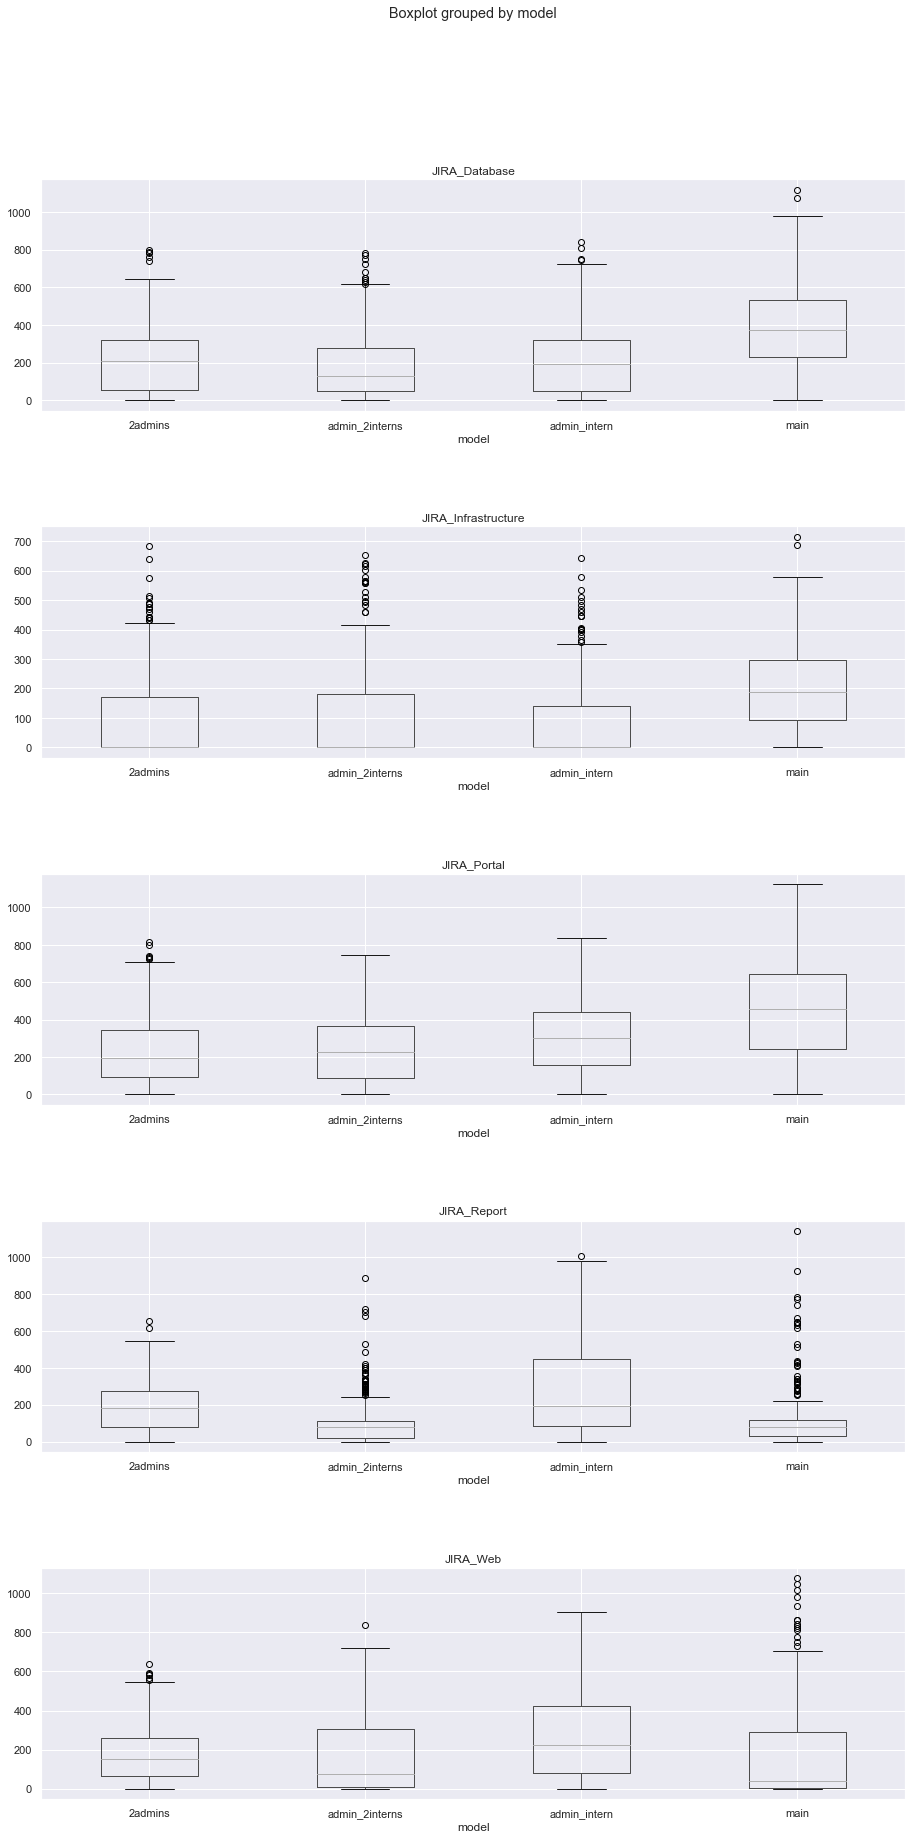

In [17]:
fig, axes = plt.subplots(5,1, figsize=(15, 30));
plt.subplots_adjust(hspace=0.5);
jira_df.groupby("task").boxplot(by = "model", column = "non_work_time", ax = axes, sharey = True);

In [18]:
jira_df["Номер альтернативы"] = jira_df.model.transform(get_model_id)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Анализ времени простоя завершенных проектов

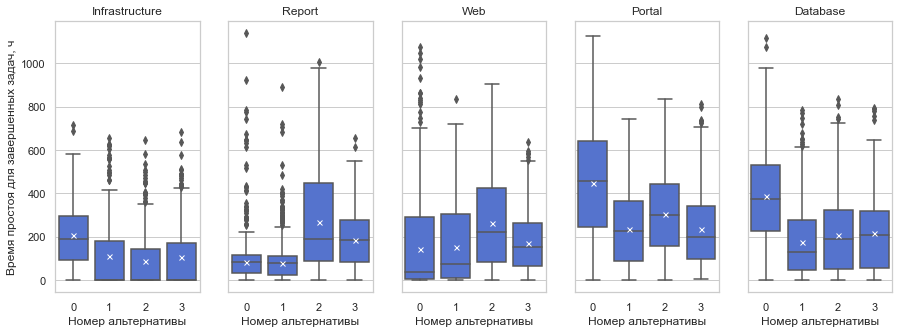

In [19]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1,5,figsize = (15,5), sharey = True)
unique_tasks = set(jira_df.task)

for i,task in enumerate(unique_tasks):
    sns.boxplot(x = "Номер альтернативы", y= "non_work_time", color = "royalblue",
                data = jira_df[jira_df["task"] == task], ax = axes[i], showmeans=True, meanprops={"marker":"x",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"})
    axes[i].set_title(task.replace("JIRA_",""))
    if i > 0 :
        axes[i].set(ylabel = "")
    else:
        axes[i].set(ylabel = "Время простоя для завершенных задач, ч")       
#plt.savefig("D:/YandexDisk/ВКР/Текст/non_work.png", format="png")         

Перевод U Манна-Уитни в размер эффекта Cohen's r
1. **При n>19 U распределен нормально и его можно преобразовать в Z значение** [Wilson V.L. Critical Values of the Rank-Biserial Correlation Coefficient // Educational and Psychological Measurement. 1976. Vol. 36. No. 2. P. 297-300.]
2. **Z преобразовывается в Cohen's r** [Fritz C., Morris P.E., Richler J.J. Effect Size Estimates: Current Use, Calculations, and Interpretation // Journal of Experimental Psychology General. 2011. Vol. 141. No. 1. P. 2-18.]

**Соответствие размера эффекта** [Cohen J. Statistical power analysis for the behavioral sciences. - NY.: Published by Lawrence Erlbaum Associates, 1988. – 579 p. (p.79-80)]:

|Пороговое значение r|Размер эффекта|
|---|---|
|0,1|Слабый|
|0,3|Средний|
|0,5|Высокий|

In [27]:
def calculate_cohens_r_from_U(U,n1,n2):
    N = n1 + n2
    numerator = U - n1*n2/2
    divider = sqrt((n1*n2*(N+1)) / 12)
    Z = numerator / divider
    r = Z / sqrt(N)
    return abs(r)

[Text(0, 0.5, 'Время в ожидании, ч'),
 Text(0.5, 1.0, 'Инфраструктурные работы (Infrastructure)')]

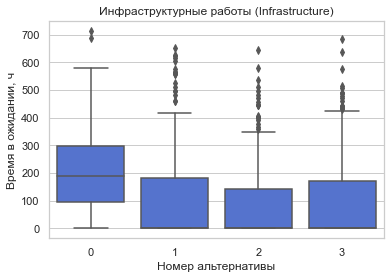

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = "Номер альтернативы",y = "non_work_time",data = jira_df[jira_df["task"] == "JIRA_Infrastructure"], 
           color = "royalblue"
           )
ax.set(ylabel='Время в ожидании, ч', title= "Инфраструктурные работы (Infrastructure)")
#plt.savefig("D:/YandexDisk/ВКР/Текст/Infra.png", format="png")

In [191]:
x0 = jira_df[(jira_df["task"] == "JIRA_Infrastructure") &  (jira_df["Номер альтернативы"] == 0)].non_work_time
x1 = jira_df[(jira_df["task"] == "JIRA_Infrastructure") &  (jira_df["Номер альтернативы"] == 1)].non_work_time
x2 = jira_df[(jira_df["task"] == "JIRA_Infrastructure") &  (jira_df["Номер альтернативы"] == 2)].non_work_time
x3 = jira_df[(jira_df["task"] == "JIRA_Infrastructure") &  (jira_df["Номер альтернативы"] == 3)].non_work_time

#stats.shapiro(x3) #pvalue=3.962451608586508e-21
#stats.kruskal(x0,x1,x2,x3) #pvalue=8.251642057924096e-3
#stats.kruskal(x1,x2,x3) #pvalue=0.6543728950776602

u_Infra,p_Infra =  stats.mannwhitneyu(x2,x3, alternative = "less")
print("Effect size = ",calculate_cohens_r_from_U(u_Infra,len(x2),len(x3)),"\np-value = ",p_Infra)

Effect size =  0.01927303005104639 
p-value =  0.31175085633752353


Размер эффекта сравнения каждой альтернативной модели с основной был больше 0,4. Напротив, слабый эффект был получен при тестировании сценариев между собой. Максимальное значение r Коэна – 0,17, минимальное p-значение – 0,18. Работы с Infrastructure простаивают одинаково меньше во всех предложенных вариантах схемы.

[Text(0, 0.5, 'Время в ожидании, ч'),
 Text(0.5, 1.0, 'Интеграция данных (Database)')]

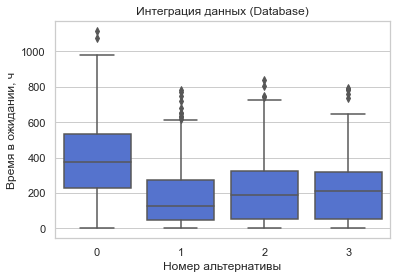

In [34]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = "Номер альтернативы",y = "non_work_time",data = jira_df[jira_df["task"] == "JIRA_Database"], 
           color = "royalblue"
           )
ax.set(ylabel='Время в ожидании, ч', title= "Интеграция данных (Database)")
#plt.savefig("D:/YandexDisk/ВКР/Текст/Database.png", format="png")

In [98]:
x0 = jira_df[(jira_df["task"] == "JIRA_Database") &  (jira_df["Номер альтернативы"] == 0)].non_work_time
x1 = jira_df[(jira_df["task"] == "JIRA_Database") &  (jira_df["Номер альтернативы"] == 1)].non_work_time
x2 = jira_df[(jira_df["task"] == "JIRA_Database") &  (jira_df["Номер альтернативы"] == 2)].non_work_time
x3 = jira_df[(jira_df["task"] == "JIRA_Database") &  (jira_df["Номер альтернативы"] == 3)].non_work_time

#stats.shapiro(x3) # pvalue=1.6312552166258126e-13
#sm.qqplot(x3, line = 'r')
#stats.kruskal(x0,x1,x2,x3) # pvalue=4.143860327561947e-57

u_DB,p_DB =  stats.mannwhitneyu(x1,x2, alternative = "less")
print("Effect size = ",calculate_cohens_r_from_U(u_DB,len(x1),len(x2)),"\np-value = ",p_DB)

Effect size =  0.10055403631300865 
p-value =  0.001082921811911183


Для задач Database также все альтернативны показывают значимо меньшие значения, по сравнению с главной моделью. Максимальный размер эффекта – 0,5. Тесты не показали разницы для второй и третьей альтернатив. P-значение равняется 0,15, размер эффекта – 0,03. Альтернативы также слабо различаются между собой. Все альтернативные варианты продемонстрировали снижение средней длительности простоя более чем на 80%.

[Text(0, 0.5, 'Время в ожидании, ч'),
 Text(0.5, 1.0, 'Разработка веб-сервисов (Web)')]

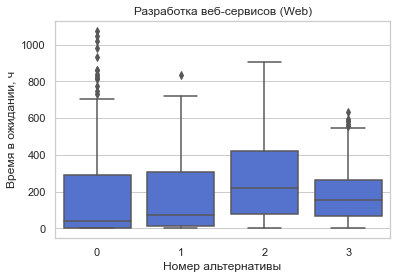

In [79]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = "Номер альтернативы",y = "non_work_time",data = jira_df[jira_df["task"] == "JIRA_Web"], 
           color = "royalblue"
           )
ax.set(ylabel='Время в ожидании, ч', title= "Разработка веб-сервисов (Web)")
#plt.savefig("D:/YandexDisk/ВКР/Текст/Web.png", format="png")

In [91]:
x0 = jira_df[(jira_df["task"] == "JIRA_Web") &  (jira_df["Номер альтернативы"] == 0)].non_work_time
x1 = jira_df[(jira_df["task"] == "JIRA_Web") &  (jira_df["Номер альтернативы"] == 1)].non_work_time
x2 = jira_df[(jira_df["task"] == "JIRA_Web") &  (jira_df["Номер альтернативы"] == 2)].non_work_time
x3 = jira_df[(jira_df["task"] == "JIRA_Web") &  (jira_df["Номер альтернативы"] == 3)].non_work_time

#stats.shapiro(x1) #pvalue=1.113635700462438e-36
#sm.qqplot(x1, line = 'r')
#stats.kruskal(x0,x1,x2,x3) # pvalue=6.458781205924467e-103

u_Web,p_Web =  stats.mannwhitneyu(x1,x3, alternative = "less")
print("Effect size = ",calculate_cohens_r_from_U(u_Web,len(x1),len(x3)),"\np-value = ",p_Web)

Effect size =  0.14178369771189187 
p-value =  7.820618166240863e-17


Проекты Web в альтернативных моделях, наоборот, статистически больше простаивают, чем в основной. Заметно выделяется второй вариант с размером эффекта 0,35 и увеличением средней длительности ожидания на 88% или 124 рабочих часа. Сравнение первой и третьей схем показало p-значение намного меньше порогового, но слабый размер эффекта 0,14. Их простой больше на 7 и 20% или 10 и 21 часа соответственно. 

[Text(0, 0.5, 'Время в ожидании, ч'),
 Text(0.5, 1.0, 'Развитие портала (Portal)')]

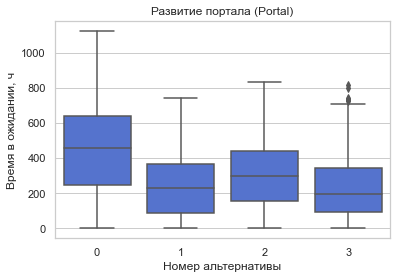

In [193]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = "Номер альтернативы",y = "non_work_time",data = jira_df[jira_df["task"] == "JIRA_Portal"], 
           color = "royalblue"
           )
ax.set(ylabel='Время в ожидании, ч', title= "Развитие портала (Portal)")
#plt.savefig("D:/YandexDisk/ВКР/Текст/Portal.png", format="png")

In [108]:
x0 = jira_df[(jira_df["task"] == "JIRA_Portal") &  (jira_df["Номер альтернативы"] == 0)].non_work_time
x1 = jira_df[(jira_df["task"] == "JIRA_Portal") &  (jira_df["Номер альтернативы"] == 1)].non_work_time
x2 = jira_df[(jira_df["task"] == "JIRA_Portal") &  (jira_df["Номер альтернативы"] == 2)].non_work_time
x3 = jira_df[(jira_df["task"] == "JIRA_Portal") &  (jira_df["Номер альтернативы"] == 3)].non_work_time

#stats.shapiro(x1) # pvalue=3.1698634339876808e-18
#sm.qqplot(x1, line = 'r')

#stats.kruskal(x0,x1,x2,x3) # pvalue=1.635234095796226e-86
stats.kruskal(x1,x2,x3)
u_Portal,p_Portal =  stats.mannwhitneyu(x1,x2, alternative = "less")
print("Effect size = ",calculate_cohens_r_from_U(u_Portal,len(x1),len(x2)),"\np-value = ",p_Portal)

Effect size =  0.17456758119217006 
p-value =  1.9284948721544356e-16


Сравнение для проектов по развитию портала показало статистическую значимость того, что альтернативы меньше простаивают с размером эффекта 0,4. Статистические тестирования сценариев между собой показывают слабый размер эффекта 0,17, в случае сравнения первой и третьей p-значение равно 0,25. В результате экспериментов средний простой снизился более чем на 47%.

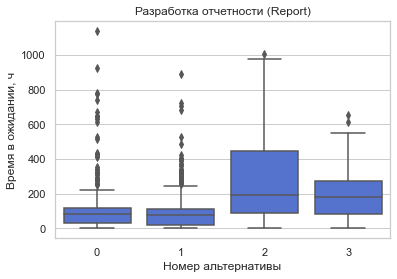

In [341]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = "Номер альтернативы",y = "non_work_time",data = jira_df[jira_df["task"] == "JIRA_Report"], 
           color = "royalblue"
           )
ax.set(ylabel='Время в ожидании, ч', title= "Разработка отчетности (Report)")
#plt.savefig("D:/YandexDisk/ВКР/Текст/Report.png", format="png")

In [120]:
x0 = jira_df[(jira_df["task"] == "JIRA_Report") &  (jira_df["Номер альтернативы"] == 0)].non_work_time
x1 = jira_df[(jira_df["task"] == "JIRA_Report") &  (jira_df["Номер альтернативы"] == 1)].non_work_time
x2 = jira_df[(jira_df["task"] == "JIRA_Report") &  (jira_df["Номер альтернативы"] == 2)].non_work_time
x3 = jira_df[(jira_df["task"] == "JIRA_Report") &  (jira_df["Номер альтернативы"] == 3)].non_work_time

#stats.shapiro(x2) # pvalue=1.3585303984315106e-24
#sm.qqplot(x2, line = 'r')
#stats.kruskal(x1,x2,x3,x4)

u_Report,p_Report =  stats.mannwhitneyu(x1,x0, alternative = "less")
print("Effect size = ",calculate_cohens_r_from_U(u_Report,len(x1),len(x0)),"\np-value = ",p_Report)

Effect size =  0.04064886268789165 
p-value =  0.03419898895089734


Результат анализа данных по Report привел к выводу, что ожидание в основной схеме значительно меньше, чем во второй и третьей альтернативах с размером эффекта 0,45. Сравнение с первым вариантом показало p-значение и r Коэна равными 0,03 при нулевой гипотезе, что простой в первой меньше. Тем самым, среднее ожидание подготовки дашбордов увеличилось только во второй и третьей схемах более чем в два раза.

## Графики времени простоя в абсолютных величинах

In [266]:
#Среднее Количество выполненных задач за итерацию
jira_df.groupby(["task","model"])["non_work_time"].count()/n_iter

task                 model         
JIRA_Database        2admins            4.31
                     admin_2interns     4.98
                     admin_intern       4.32
                     main               3.96
JIRA_Infrastructure  2admins            2.65
                     admin_2interns     2.77
                     admin_intern       2.59
                     main               2.35
JIRA_Portal          2admins           11.47
                     admin_2interns    11.64
                     admin_intern      10.11
                     main               6.04
JIRA_Report          2admins           11.89
                     admin_2interns    10.19
                     admin_intern      10.18
                     main               9.91
JIRA_Web             2admins           18.99
                     admin_2interns    14.88
                     admin_intern      14.22
                     main              14.25
Name: non_work_time, dtype: float64

In [365]:
jira_df.groupby(["task","model"])["non_work_time"].sum() /  jira_df.groupby(["task","model"])["non_work_time"].count()

task                 model         
JIRA_Database        2admins           215.375870
                     admin_2interns    175.326841
                     admin_intern      206.949421
                     main              386.447517
JIRA_Infrastructure  2admins           103.970189
                     admin_2interns    109.875211
                     admin_intern       88.070077
                     main              209.011844
JIRA_Portal          2admins           234.512002
                     admin_2interns    237.454296
                     admin_intern      302.840307
                     main              446.008030
JIRA_Report          2admins           186.592683
                     admin_2interns     79.896614
                     admin_intern      269.346922
                     main               85.061672
JIRA_Web             2admins           171.250263
                     admin_2interns    150.782023
                     admin_intern      264.151676
              

In [21]:
#Среднее Количество выполненных задач за итерацию
jira_df.groupby(["model","task","staff"])["non_work_time"].count()/n_iter

model           task                 staff    
2admins         JIRA_Database        developer     0.86
                                     manager       3.45
                JIRA_Infrastructure  developer     2.65
                JIRA_Portal          admin         6.51
                                     manager       4.96
                JIRA_Report          admin        11.89
                JIRA_Web             admin        18.99
admin_2interns  JIRA_Database        developer     0.73
                                     manager       4.25
                JIRA_Infrastructure  developer     2.77
                JIRA_Portal          admin         9.05
                                     manager       2.59
                JIRA_Report          admin         0.46
                                     intern        9.73
                JIRA_Web             admin         3.26
                                     intern       11.62
admin_intern    JIRA_Database        developer     0.80
 

In [616]:
jira_df.groupby(["model","task"]).count()

source_id  queue_time  wip_time  prm_time  \
model          task                                                             
2admins        JIRA_Database              431         431       431       431   
               JIRA_Infrastructure        265         265       265       265   
               JIRA_Portal               1147        1147      1147      1147   
               JIRA_Report               1189        1189      1189      1189   
               JIRA_Web                  1899        1899      1899      1899   
admin_2interns JIRA_Database              498         498       498       498   
               JIRA_Infrastructure        277         277       277       277   
               JIRA_Portal               1164        1164      1164      1164   
               JIRA_Report               1019        1019      1019      1019   
               JIRA_Web                  1488        1488      1488      1488   
admin_intern   JIRA_Database              432         432       432       432   
               JIRA_Infrastructure        259         259       259       259   
               JIRA_Portal               1011        1011      1011      1011   
               JIRA_Report               1018        1018      1018      1018   
               JIRA_Web                  1422        1422      1422      1422   
main           JIRA_Database              396         396       396       396   
               JIRA_Infrastructure        235         235       235       235   
               JIRA_Portal                604         604       604       604   
               JIRA_Report                991         991       991       991   
               JIRA_Web                  1425        1425      1425      1425   

                                    staff  non_work_time  nw_wip  \
model          task                                                
2admins        JIRA_Database          431            431     431   
               JIRA_Infrastructure    265            265     265   
               JIRA_Portal           1147           1147    1147   
               JIRA_Report           1189           1189    1189   
               JIRA_Web              1899           1899    1899   
admin_2interns JIRA_Database          498            498     498   
               JIRA_Infrastructure    277            277     277   
               JIRA_Portal           1164           1164    1164   
               JIRA_Report           1019           1019    1019   
               JIRA_Web              1488           1488    1488   
admin_intern   JIRA_Database          432            432     432   
               JIRA_Infrastructure    259            259     259   
               JIRA_Portal           1011           1011    1011   
               JIRA_Report           1018           1018    1018   
               JIRA_Web              1422           1422    1422   
main           JIRA_Database          396            396     396   
               JIRA_Infrastructure    235            235     235   
               JIRA_Portal            604            604     604   
               JIRA_Report            991            991     991   
               JIRA_Web              1425           1425    1425   

                                    Номер альтернативы  
model          task                                     
2admins        JIRA_Database                       431  
               JIRA_Infrastructure                 265  
               JIRA_Portal                        1147  
               JIRA_Report                        1189  
               JIRA_Web                           1899  
admin_2interns JIRA_Database                       498  
               JIRA_Infrastructure                 277  
               JIRA_Portal                        1164  
               JIRA_Report                        1019  
               JIRA_Web                           1488  
admin_intern   JIRA_Database                       432  
               

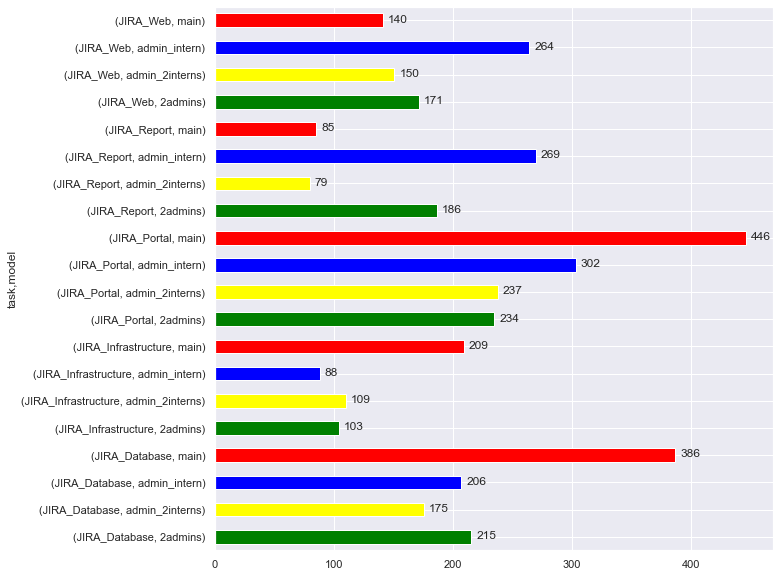

In [22]:
# Среднее ожидание на одну задачу
ax = jira_df.groupby(["task","model"])["non_work_time"].mean().plot.barh(sort_columns = True, color = {"yellow","green","red","blue"}, figsize=(10,10))
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 5), textcoords='offset points')

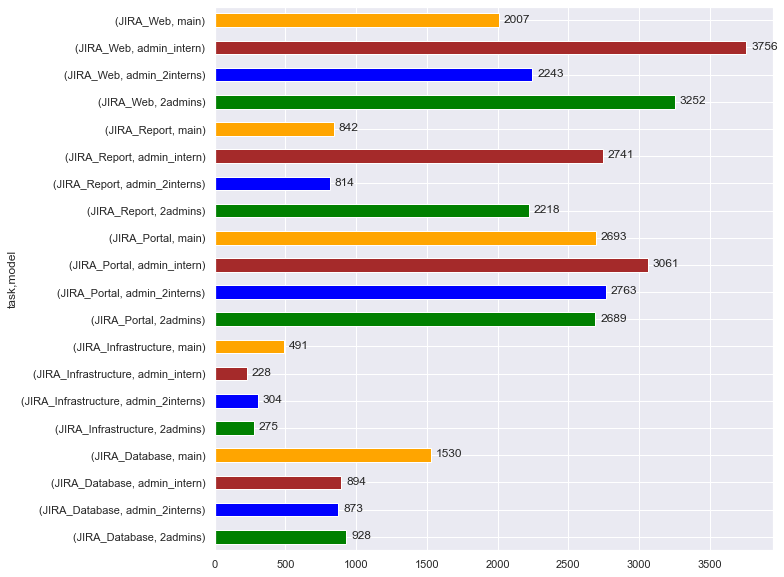

In [23]:
# Среднее ожидание за итерацию
# Может быть выше, чем ожидание за задачу, так как больше задач выполняется за итерацию
jira_sum = jira_df.groupby(["task","model"])["non_work_time"].sum()/n_iter
ax = jira_sum.plot.barh(sort_columns = True, color = {"brown","orange","blue","green"}, figsize=(10,10))
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 5), textcoords='offset points')

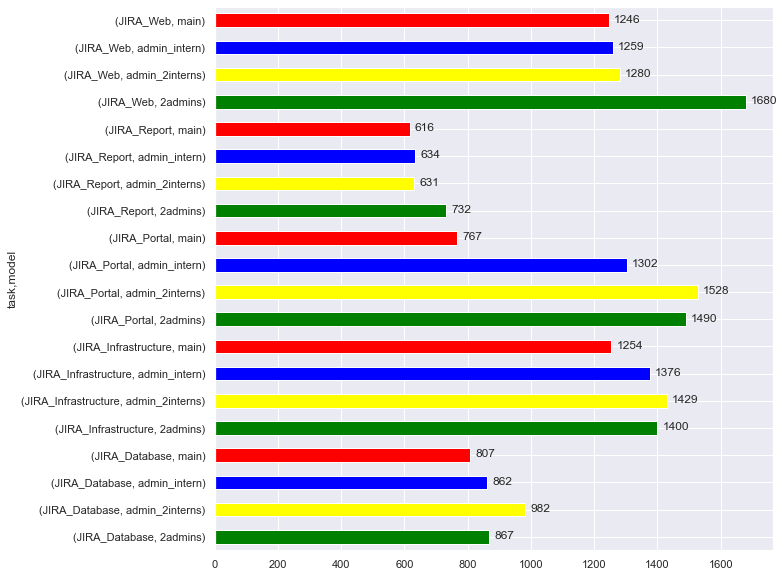

In [24]:
# Среднее общее wip_time за итерацию
jira_sum = jira_df.groupby(["task","model"])["wip_time"].sum()/n_iter
ax = jira_sum.plot.barh(sort_columns = True, color = {"yellow","green","red","blue"}, figsize=(10,10))
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 5), textcoords='offset points')

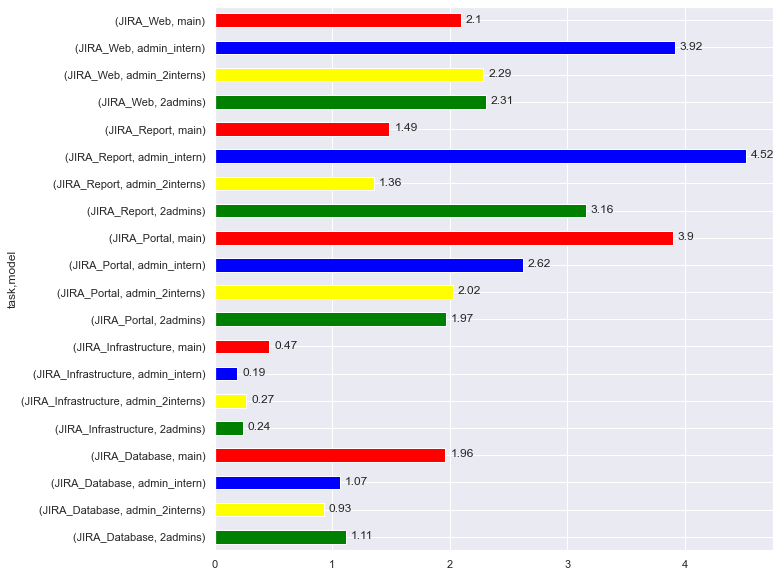

In [25]:
# Среднее non_working / wip на одну задачу
ax = jira_df.groupby(["task","model"])["nw_wip"].mean().plot.barh(sort_columns = True, color = {"yellow","green","red","blue"}, figsize=(10,10))
for p in ax.patches:
    ax.annotate(str(round(float(p.get_width()),2)), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 5), textcoords='offset points')

In [349]:
pd.DataFrame(jira_df.groupby(["task","Номер альтернативы"])["nw_wip"].mean()).to_excel("D:/YandexDisk/Мага/2 курс/ВКР/Текст/Files/nw_wip.xlsx")

### Результат анализа времени простоя завершенных задач
Database - альтернативы одинаково лучше main (2 стажера чуть получше)

Infra - альтернативы одинаково лучше main (1 стажер чуть лучше)

Portal - админы и 2 стажера выигрывают

Report - main почти такой же, как и с админов. Админы чуть-чуть проигрывают, но разброс у них меньше

Web - main чуть-чуть выигрывает у админов и двух стажеров. Админы делают на 4 задачи больше.

## Сравнение количества задач в системе на конец моделирования

In [121]:
nis_main = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/nis.xlsx")
nis_admin_intern = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/adm_inte_ler_final_v2/nis.xlsx")
nis_admin_2interns = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/admin_2intern_learning_final_v2/nis.xlsx")
nis_admins = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/admins_final_v2/nis.xlsx")

In [122]:
nis_main["model"], nis_admin_intern["model"], nis_admins["model"], nis_admin_2interns["model"] = "main", "admin_intern", "2admins", "admin_2interns"

In [123]:
united_nis = pd.concat([nis_main,nis_admin_intern,nis_admins,nis_admin_2interns], ignore_index = True)

In [124]:
united_nis.groupby("model").describe()

nis_count                                                
                   count   mean       std   min   25%   50%    75%   max
model                                                                   
2admins            100.0  10.69  2.111512   6.0   9.0  10.0  13.00  15.0
admin_2interns     100.0  15.54  3.072919   8.0  14.0  15.0  17.25  24.0
admin_intern       100.0  18.58  3.525320  11.0  16.0  18.0  21.00  27.0
main               100.0  23.49  3.445081  18.0  21.0  22.5  25.00  34.0

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  This is separate from the ipykernel package so we can avoid doing imports until


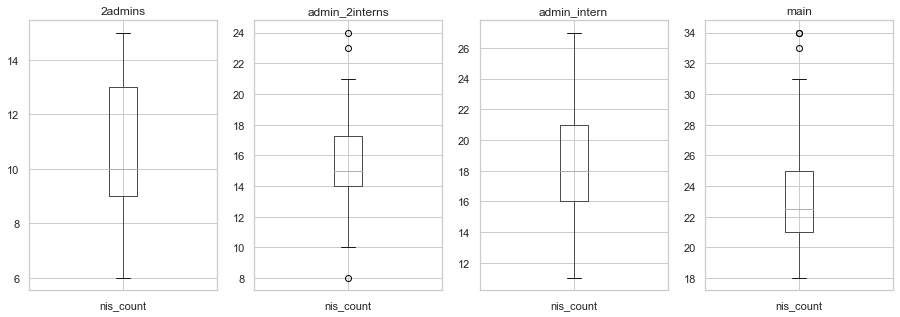

In [125]:
fig, axes = plt.subplots(1,4, figsize=(15, 5));
plt.subplots_adjust(hspace=0.5);
united_nis.groupby("model").boxplot(column = "nis_count", ax = axes, sharey = True);

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'2admins'}>,
        <AxesSubplot:title={'center':'admin_2interns'}>],
       [<AxesSubplot:title={'center':'admin_intern'}>,
        <AxesSubplot:title={'center':'main'}>]], dtype=object)

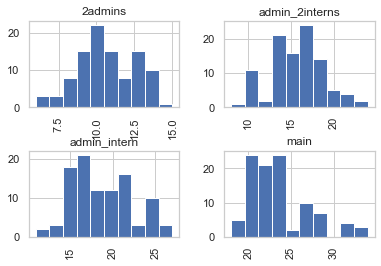

In [126]:
united_nis.hist(by = "model")

In [127]:
set(nis_admins.nis_count).intersection(nis_admin_2interns.nis_count)

{8, 10, 11, 12, 13, 14, 15}

In [128]:
stats.shapiro(nis_admin_intern.nis_count) # ненормальное

ShapiroResult(statistic=0.9545872211456299, pvalue=0.0016848703380674124)

D:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


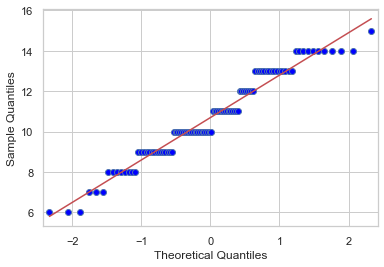

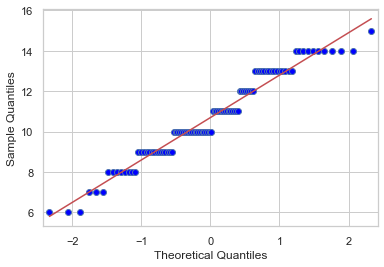

In [129]:
sm.qqplot(nis_admins.nis_count, line = 's')

<AxesSubplot:xlabel='model', ylabel='nis_count'>

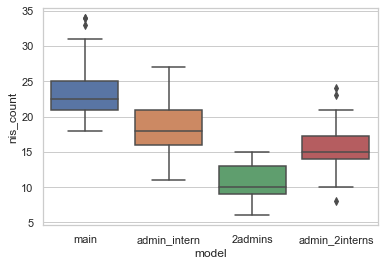

In [130]:
sns.boxplot(x="model", y="nis_count", data = united_nis)

In [131]:
stats.fligner(nis_admins.nis_count,nis_admin_2interns.nis_count, center = "median")

FlignerResult(statistic=7.625524777399181, pvalue=0.005754792204835978)

In [132]:
u, p_value = stats.mannwhitneyu(nis_admins.nis_count,nis_admin_2interns.nis_count, alternative = "less") # админы имеют меньше eop
print("Effect size = ",calculate_cohens_r_from_U(u,100,100),"\np-value = ",p_value)

Effect size =  0.7015475484146225 
p-value =  1.1031784281588668e-23


In [133]:
u1, p_value1 = stats.mannwhitneyu(nis_admins.nis_count,nis_admin_intern.nis_count, alternative = "less") # админы имеют меньше eop
print("Effect size = ",calculate_cohens_r_from_U(u1,100,100),"\np-value = ",p_value1)

Effect size =  0.8425308754695005 
p-value =  3.503677042139125e-33


In [134]:
u2, p_value2 = stats.mannwhitneyu(nis_admins.nis_count,nis_main.nis_count, alternative = "less") # админы имеют меньше eop
print("Effect size = ",calculate_cohens_r_from_U(u2,100,100),"\np-value = ",p_value2)

Effect size =  0.86386842558136 
p-value =  8.742853790541836e-35


### Результат анализа количества задач на конец периода моделирования
Два администратора показывают намного лучше результат

## Время в очереди незавершенных задач

In [135]:
main_queue_eop_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/main_final_v2/queue_eop.xlsx")
admin_intern_queue_eop_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/adm_inte_ler_final_v2/queue_eop.xlsx")
admins_eop_queue_eop_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/admins_final_v2/queue_eop.xlsx")
admin_2interns_queue_eop_df = pd.read_excel("D:/YandexDisk/ВКР/Model/VKR/admin_2intern_learning_final_v2/queue_eop.xlsx")

In [136]:
main_queue_eop_df["model"], admin_intern_queue_eop_df["model"], admins_eop_queue_eop_df["model"],admin_2interns_queue_eop_df["model"] = "main", "admin_intern", "2admins", "admin_2interns"

In [137]:
united_queue_eop = pd.concat ([main_queue_eop_df, admin_intern_queue_eop_df, admins_eop_queue_eop_df,admin_2interns_queue_eop_df], ignore_index = True)

In [138]:
united_queue_eop["task"] = united_queue_eop.source_id.map(labelsDict)

In [139]:
united_queue_eop.groupby(["task","model"]).queue_eop_time.describe()

count        mean         std         min  \
task                model                                                       
JIRA_Database       2admins         169.0  483.566864  145.910704  160.400000   
                    admin_2interns  102.0  423.483333  170.029176  105.083333   
                    admin_intern    168.0  484.625298  145.612647  148.083333   
                    main            204.0  541.412990  169.548023  376.266667   
JIRA_Infrastructure 2admins         235.0  696.140426  176.239165  237.033333   
                    admin_2interns  223.0  697.526831  169.622874  234.566667   
                    admin_intern    241.0  694.715145  185.735653  220.583333   
                    main            265.0  732.961195  178.530297  236.716667   
JIRA_Portal         2admins         353.0  315.662276  294.619500    0.000000   
                    admin_2interns  336.0  277.200248  261.980472    0.000000   
                    admin_intern    489.0  421.630436  301.199699    0.000000   
                    main            896.0  599.538523  299.575843   48.000000   
JIRA_Report         2admins         111.0  134.122823  107.650886    0.016667   
                    admin_2interns  281.0  266.156287  139.687100   88.000000   
                    admin_intern    282.0  275.590603  161.227302   88.000000   
                    main            309.0  287.078479  167.552623   88.000000   
JIRA_Web            2admins         201.0  249.236318   70.036422   59.083333   
                    admin_2interns  612.0  379.829820  152.023372  188.933333   
                    admin_intern    678.0  416.134415  183.037833  188.100000   
                    main            675.0  404.411309  179.766210  208.000000   

                                           25%         50%         75%  \
task                model                                                
JIRA_Database       2admins         376.266667  376.266667  680.916667   
                    admin_2interns  335.050000  376.266667  582.987500   
                    admin_intern    376.266667  376.266667  688.000000   
                    main            376.266667  683.408333  688.000000   
JIRA_Infrastructure 2admins         620.583333  620.583333  846.283333   
                    admin_2interns  620.583333  620.583333  856.975000   
                    admin_intern    620.583333  620.583333  884.866667   
                    main            620.583333  620.583333  971.183333   
JIRA_Portal         2admins          48.000000  102.400000  616.000000   
                    admin_2interns   48.000000  102.400000  591.766667   
                    admin_intern    102.400000  591.766667  616.000000   
                    main            591.766667  719.500000  813.566667   
JIRA_Report         2admins          88.000000   88.000000   88.000000   
                    admin_2interns   88.000000  349.716667  352.000000   
                    admin_intern     88.000000  349.716667  352.000000   
                    main             88.000000  349.716667  352.000000   
JIRA_Web            2admins         208.000000  256.350000  290.966667   
                    admin_2interns  272.050000  344.066667  368.000000   
                    admin_intern    272.050000  368.000000  576.083333   
                    main            272.050000  352.016667  514.383333   

                                            max  
task                model                        
JIRA_Database       2admins          688.000000  
                    admin_2interns   688.000000  
                    admin_intern     688.000000  
                    main            1126.600000  
JIRA_Infrastructure 2admins          971.183333  
                    admin_2interns   971.183333  
                    admin_intern     986.700000  
                    main             986.700000  
JIRA_Portal         2admins          882.333333  
                    admin_2interns   822.050000  
                    admi

In [140]:
united_queue_eop["Номер альтернативы"] = united_queue_eop.model.transform(get_model_id)
united_queue_eop["Номер альтернативы"].describe()

count    6830.000000
mean        1.241142
std         1.088138
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Номер альтернативы, dtype: float64

In [151]:
united_queue_eop.groupby(["task","model"]).source_id.count()/n_iter

task                 model         
JIRA_Database        2admins           1.69
                     admin_2interns    1.02
                     admin_intern      1.68
                     main              2.04
JIRA_Infrastructure  2admins           2.35
                     admin_2interns    2.23
                     admin_intern      2.41
                     main              2.65
JIRA_Portal          2admins           3.53
                     admin_2interns    3.36
                     admin_intern      4.89
                     main              8.96
JIRA_Report          2admins           1.11
                     admin_2interns    2.81
                     admin_intern      2.82
                     main              3.09
JIRA_Web             2admins           2.01
                     admin_2interns    6.12
                     admin_intern      6.78
                     main              6.75
Name: source_id, dtype: float64

Database, Infra, Portal - 2 стажера выигрывают

Web, Report - админы сильно выигрывают

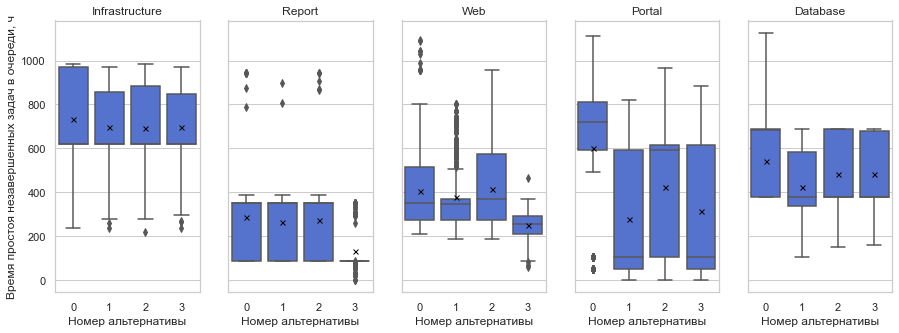

In [142]:
#united_queue_eop.groupby(["model"]).boxplot(by = "task", column = "queue_eop_time")
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1,5,figsize = (15,5), sharey = True)
unique_tasks = set(united_queue_eop.task)

for i,task in enumerate(unique_tasks):
    sns.boxplot(x = "Номер альтернативы", y= "queue_eop_time", color = "royalblue",
                data = united_queue_eop[(united_queue_eop["task"] == task)], ax = axes[i], showmeans=True, meanprops={"marker":"x",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
    axes[i].set_title(task.replace("JIRA_",""))
    if i > 0 :
        axes[i].set(ylabel = "")
    else:
        axes[i].set(ylabel = "Время простоя незавершенных задач в очереди, ч")

In [160]:
x0 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Infrastructure") &  (united_queue_eop["Номер альтернативы"] == 0)].queue_eop_time
x1 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Infrastructure") &  (united_queue_eop["Номер альтернативы"] == 1)].queue_eop_time
x2 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Infrastructure") &  (united_queue_eop["Номер альтернативы"] == 2)].queue_eop_time
x3 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Infrastructure") &  (united_queue_eop["Номер альтернативы"] == 3)].queue_eop_time

#stats.shapiro(x3) #pvalue=8.85045671732837e-13
#stats.kruskal(x0,x1,x2,x3) #pvalue=0.021608034011369934

u_Infra,p_Infra =  stats.mannwhitneyu(x1,x3, alternative = "less")
print("Effect size = ",calculate_cohens_r_from_U(u_Infra,len(x1),len(x3)),"\np-value = ",p_Infra)

Effect size =  0.005841689170608769 
p-value =  0.44841143080595003


Статистический анализ работ Infrastructure показал значимо меньшее ожидание новых сценариев, но со слабым эффектом равным 0,1. А сравнение альтернатив между собой не показало разницы в значениях с p-критерием равным 0,45. Среднее отклонение от начальной модели составляет 5%.

In [167]:
x0 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Report") &  (united_queue_eop["Номер альтернативы"] == 0)].queue_eop_time
x1 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Report") &  (united_queue_eop["Номер альтернативы"] == 1)].queue_eop_time
x2 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Report") &  (united_queue_eop["Номер альтернативы"] == 2)].queue_eop_time
x3 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Report") &  (united_queue_eop["Номер альтернативы"] == 3)].queue_eop_time

#stats.kruskal(x0,x1,x2,x3) #pvalue=4.0464463383385536e-26
#stats.kruskal(x0,x1,x2) #pvalue=0.4022694113468117

u_Report,p_Report =  stats.mannwhitneyu(x3,x0, alternative = "less")
print("Effect size = ",calculate_cohens_r_from_U(u_Report,len(x3),len(x0)),"\np-value = ",p_Report)

Effect size =  0.4848314418225701 
p-value =  1.7973124482331282e-25


На рисунке Report для третьей альтернативы можно заметить, что диаграмма «ящик с усами» некорректно построилась. Это произошло из-за равенства квантилей выборки. По причине отсутствия стажеров здесь неопределенность ниже, поэтому большинство наблюдений распределено около значения 88. И только эта схема показывает статистически значимые различия с размером эффекта 0,49. Среднее время ожидания меньше примерно в два раза по сравнению с остальными моделями, которые не отличаются друг от друга.

In [176]:
x0 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Web") &  (united_queue_eop["Номер альтернативы"] == 0)].queue_eop_time
x1 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Web") &  (united_queue_eop["Номер альтернативы"] == 1)].queue_eop_time
x2 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Web") &  (united_queue_eop["Номер альтернативы"] == 2)].queue_eop_time
x3 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Web") &  (united_queue_eop["Номер альтернативы"] == 3)].queue_eop_time

#stats.kruskal(x0,x1,x2,x3) # pvalue=2.747650143399196e-48

u_Web,p_Web =  stats.mannwhitneyu(x1,x0, alternative = "less")
print("Effect size = ",calculate_cohens_r_from_U(u_Web,len(x1),len(x0)),"\np-value = ",p_Web)

Effect size =  0.05573244077518833 
p-value =  0.021659910521439518


Для задач Web статистически значимо отклонение только для третьей схемы с размером эффекта 0,45. Снижение ожидания в очереди составляет 62%. Остальные сценарии практически не отличаются друг от друга. У первого варианта заметны сильные выбросы, которые вносят стажеры при своем уходе. 

In [185]:
x0 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Portal") &  (united_queue_eop["Номер альтернативы"] == 0)].queue_eop_time
x1 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Portal") &  (united_queue_eop["Номер альтернативы"] == 1)].queue_eop_time
x2 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Portal") &  (united_queue_eop["Номер альтернативы"] == 2)].queue_eop_time
x3 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Portal") &  (united_queue_eop["Номер альтернативы"] == 3)].queue_eop_time

#stats.kruskal(x0,x1,x2,x3) # pvalue=2.764445267773518e-95

u_Portal,p_Portal =  stats.mannwhitneyu(x1,x3, alternative = "less")
print("Effect size = ",calculate_cohens_r_from_U(u_Portal,len(x1),len(x3)),"\np-value = ",p_Portal)

Effect size =  0.08152573644112672 
p-value =  0.014974013083221356


Ожидание всех альтернатив для проектов Portal значимо меньше основной модели с размером эффекта 0,4. Также между собой первая и третья выборки хоть и показывают статистически значимые различия, но эффект низкий – 0,08. Незавершенные задачи имеют более чем в два раза ниже время простоя в очереди.

In [190]:
x0 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Database") &  (united_queue_eop["Номер альтернативы"] == 0)].queue_eop_time
x1 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Database") &  (united_queue_eop["Номер альтернативы"] == 1)].queue_eop_time
x2 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Database") &  (united_queue_eop["Номер альтернативы"] == 2)].queue_eop_time
x3 = united_queue_eop[(united_queue_eop["task"] == "JIRA_Database") &  (united_queue_eop["Номер альтернативы"] == 3)].queue_eop_time

#stats.kruskal(x0,x1,x2,x3) #pvalue=5.211216312066198e-09

u_Db,p_Db =  stats.mannwhitneyu(x1,x0, alternative = "less")
print("Effect size = ",calculate_cohens_r_from_U(u_Db,len(x1),len(x0)),"\np-value = ",p_Db)

Effect size =  0.31982952482297355 
p-value =  6.96803895731741e-10


Для оставшихся проектов Database статистической значимостью и средним размером эффекта равным 0,3 меньшего ожидания обладает только первая выборка. Ее отклонение в меньшую сторону от нулевого варианта составляет 28%. Остальные альтернативы одинаковы, p-значение равно 0,5.

**По результатам анализа была проведена приоритезация альтернатив с использованием метода анализа иерархий**

Итоговые коэффициенты:

|Номер альтернативы|Коэффициент анализа иерархий|
|---|---|
|1|0,41|
|2|0,12|
|3|0,47|

В результате иерархического синтеза наиболее приоритетным сценарием изменения деятельности команды является третий вариант, подразумевающий отказ от стажерской программы и найм двух администраторов корпоративного портала. Также приемлема первая альтернатива, которая будет стоить дешевле, и время простоя для проектов по созданию отчетности не изменится. Второй вариант сильно проигрывает остальным и не рекомендуется к внедрению.